In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
main_df = pd.read_csv("../data/animes_better.csv")
main_df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,link,Type,Producers,Studios,Source,Themes,Demographic,Duration,Favorites,Streaming Platforms
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,https://myanimelist.net/anime/28891/Haikyuu_Se...,TV,"['Dentsu', 'Mainichi Broadcasting System', 'Mo...",['Production I.G'],Manga,"['School', 'Team Sports']",Shounen,24.0,15764,['Crunchyroll']
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/anime/23273/Shigatsu_w...,TV,"['Aniplex', 'Dentsu', 'Kodansha', 'Fuji TV', '...",['A-1 Pictures'],Manga,"['Love Polygon', 'Music', 'School']",Shounen,22.0,86357,"['Crunchyroll', 'Netflix']"
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,https://myanimelist.net/anime/34599/Made_in_Abyss,TV,"['AT-X', 'Takeshobo', 'Sony Music Communicatio...",['Kinema Citrus'],Web manga,[],NaN,25.0,44597,"['Crunchyroll', 'HIDIVE', 'Netflix']"
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,https://myanimelist.net/anime/5114/Fullmetal_A...,TV,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...",['Bones'],Manga,[],Shounen,24.0,227331,['Crunchyroll']
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,...,https://myanimelist.net/anime/31758/Kizumonoga...,Movie,"['Aniplex', 'Kodansha']",['Shaft'],Light novel,[],NaN,83.0,7588,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,...,https://myanimelist.net/anime/10075/Naruto_x_UT,OVA,['add some'],['Pierrot'],Manga,[],Shounen,6.0,85,[]
16212,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,...,https://myanimelist.net/anime/35828/Miira_no_K...,TV,"['TBS', 'Grooove', 'Nichion', 'Exit Tunes', 'O...",['8bit'],Web manga,"['Mythology', 'Pets', 'School']",NaN,24.0,753,['Crunchyroll']
16213,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,...,https://myanimelist.net/anime/10378/Shinryaku_...,TV,"['TV Tokyo', 'Lantis', 'Pony Canyon', 'TV Toky...",['Diomedéa'],Manga,['Anthropomorphic'],Shounen,24.0,178,"['Crunchyroll', 'HIDIVE']"
16214,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,...,https://myanimelist.net/anime/33082/Kingsglaiv...,Movie,['Square Enix'],['Square Enix Visual Works'],Game,[],NaN,115.0,154,[]


In [36]:
columns_to_drop = ['title', 'aired', 'episodes', 'members', 'ranked', 'score', 'link', 'img_url']
main_df = main_df.drop(columns=columns_to_drop)
main_df

,uid,synopsis,genre,popularity,Type,Producers,Studios,Source,Themes,Demographic,Duration,Favorites,Streaming Platforms
0,28891,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",141,TV,"['Dentsu', 'Mainichi Broadcasting System', 'Mo...",['Production I.G'],Manga,"['School', 'Team Sports']",Shounen,24.0,15764,['Crunchyroll']
1,23273,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",28,TV,"['Aniplex', 'Dentsu', 'Kodansha', 'Fuji TV', '...",['A-1 Pictures'],Manga,"['Love Polygon', 'Music', 'School']",Shounen,22.0,86357,"['Crunchyroll', 'Netflix']"
2,34599,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",98,TV,"['AT-X', 'Takeshobo', 'Sony Music Communicatio...",['Kinema Citrus'],Web manga,[],NaN,25.0,44597,"['Crunchyroll', 'HIDIVE', 'Netflix']"
3,5114,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...",4,TV,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...",['Bones'],Manga,[],Shounen,24.0,227331,['Crunchyroll']
4,31758,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",502,Movie,"['Aniplex', 'Kodansha']",['Shaft'],Light novel,[],NaN,83.0,7588,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,10075,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...",2382,OVA,['add some'],['Pierrot'],Manga,[],Shounen,6.0,85,[]
16212,35828,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']",1648,TV,"['TBS', 'Grooove', 'Nichion', 'Exit Tunes', 'O...",['8bit'],Web manga,"['Mythology', 'Pets', 'School']",NaN,24.0,753,['Crunchyroll']
16213,10378,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']",1547,TV,"['TV Tokyo', 'Lantis', 'Pony Canyon', 'TV Toky...",['Diomedéa'],Manga,['Anthropomorphic'],Shounen,24.0,178,"['Crunchyroll', 'HIDIVE']"
16214,33082,"For years, the Niflheim Empire and the kingdom...",['Action'],2154,Movie,['Square Enix'],['Square Enix Visual Works'],Game,[],NaN,115.0,154,[]


In [37]:
main_df['Producers'] = main_df['Producers'].apply(eval)
main_df['Studios'] = main_df['Studios'].apply(eval)
main_df['Themes'] = main_df['Themes'].apply(eval)
main_df['Streaming Platforms'] = main_df['Streaming Platforms'].apply(eval)

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

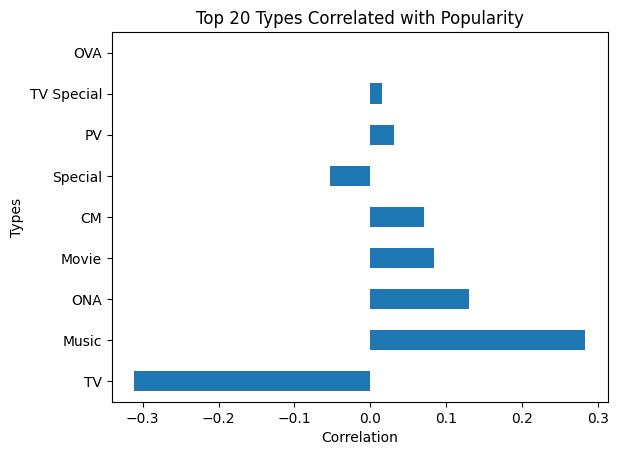

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

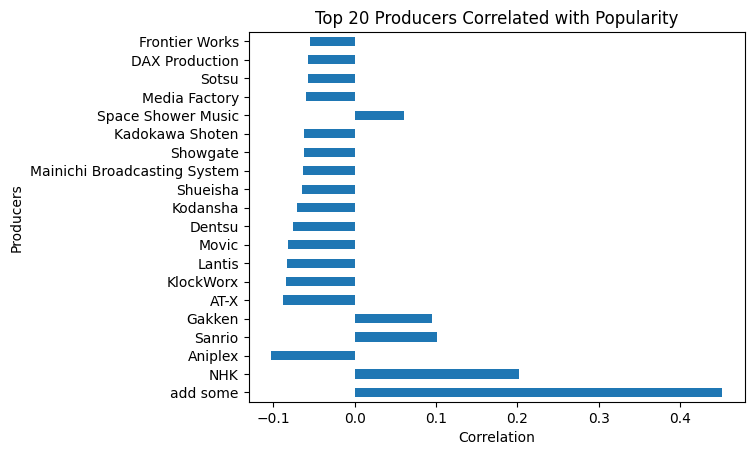

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

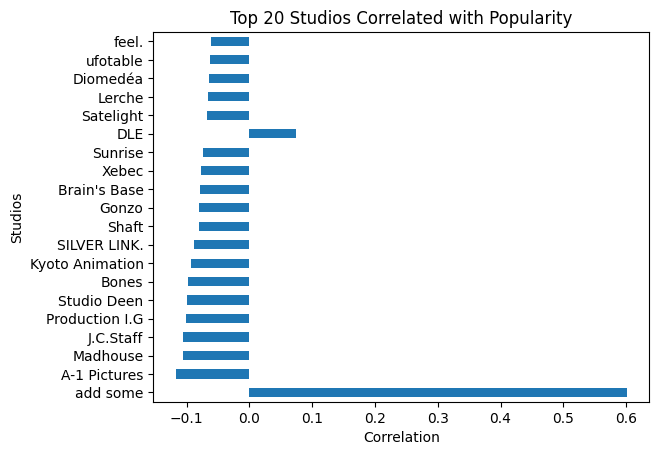

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

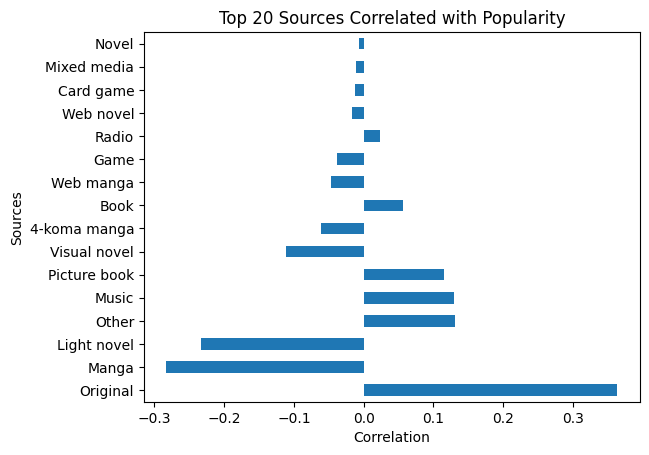

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

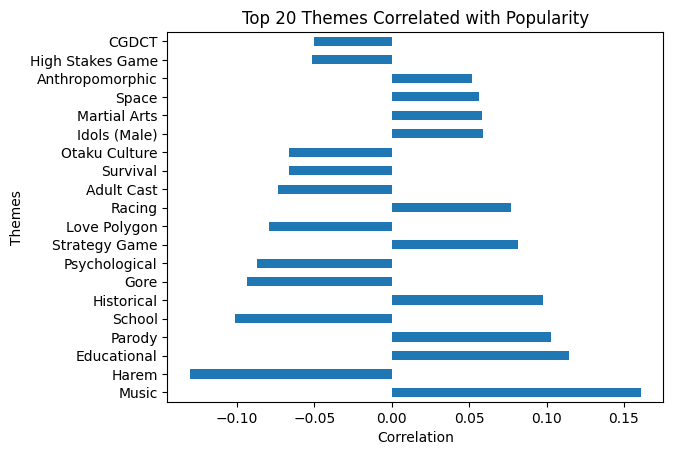

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

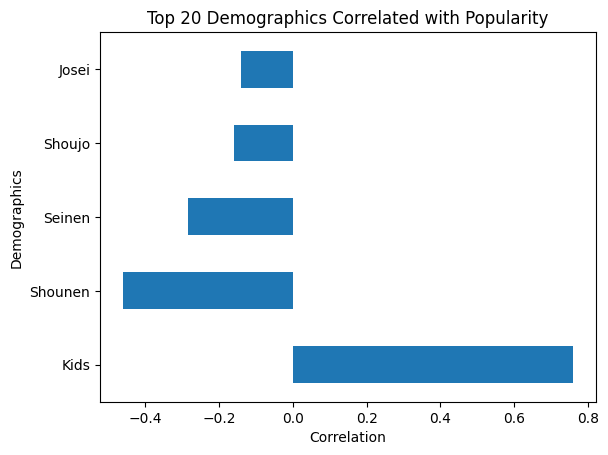

e:\Python\GitHub\anime-data-analytics-project\venv\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

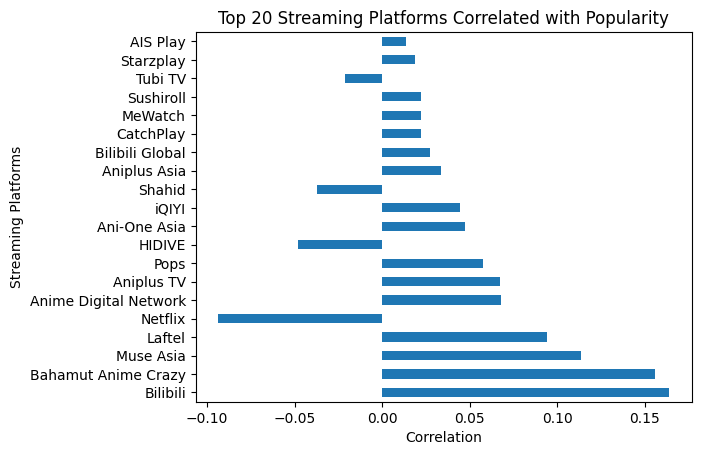

In [38]:
def sparse_corr(x, y):
    x = csr_matrix(x)
    mean_x = np.array(x.mean(axis=0)).flatten()
    mean_y = np.mean(y)
    y_centered = y - mean_y
    y_centered = csr_matrix(y_centered).T
    cov = np.array(x.multiply(y_centered).mean(axis=0)).flatten()
    std_x = np.sqrt(np.array(x.power(2).mean(axis=0) - np.square(mean_x)).flatten())
    std_y = np.std(y)
    corr = cov / (std_x * std_y)
    return corr

# Function to calculate and plot correlations
def calculate_and_plot_correlations(column, title):
    # Explode the column to handle lists
    exploded = main_df.explode(column)
    
    # Create a CountVectorizer to transform the exploded column into a sparse matrix
    vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)
    matrix = vectorizer.fit_transform(exploded[column].dropna().astype(str))
    
    # Ensure the popularity values are aligned correctly with the exploded matrix
    aligned_popularity = exploded.dropna(subset=[column])['popularity']
    
    # Calculate correlations
    correlations = sparse_corr(matrix, aligned_popularity.values)
    
    # Get feature names and create a DataFrame
    features = vectorizer.get_feature_names_out()
    corr_df = pd.DataFrame({
        'feature': features,
        'correlation': correlations
    })
    
    # Select top 20 correlations
    top_corr_df = corr_df.reindex(corr_df['correlation'].abs().sort_values(ascending=False).index).head(20)
    
    # Plot correlations
    plt.figure(figsize=(16, 8))
    top_corr_df.plot(kind='barh', x='feature', y='correlation', legend=False)
    plt.title(f'Top 20 {title} Correlated with Popularity')
    plt.xlabel('Correlation')
    plt.ylabel(title)
    plt.show()

# Apply the function to each column
calculate_and_plot_correlations('Type', 'Types')
calculate_and_plot_correlations('Producers', 'Producers')
calculate_and_plot_correlations('Studios', 'Studios')
calculate_and_plot_correlations('Source', 'Sources')
calculate_and_plot_correlations('Themes', 'Themes')
calculate_and_plot_correlations('Demographic', 'Demographics')
calculate_and_plot_correlations('Streaming Platforms', 'Streaming Platforms')